In [72]:
library(MASS)
library(tree)
library(randomForest)
library(visNetwork)
library(rpart)
library(ggplot2)



Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin




# Problem 1

In [50]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [52]:
#split the data into train, dev, and test sets
indx = sample(1:nrow(Boston), nrow(Boston)*0.7)
train = Boston[indx,]
dev = Boston[-indx,]
indx2 = sample(1:nrow(dev), nrow(dev)*0.5)
test = dev[-indx2,]
dev = dev[indx2,]

In [54]:
#print the dimensions of the data sets
print(dim(Boston))
print(dim(train))
print(dim(dev))
print(dim(test))


[1] 506  14
[1] 354  14
[1] 76 14
[1] 76 14


## Part A

In [82]:
tree1 = randomForest(medv ~ ., data = train, importance=TRUE, mtry = 6, ntree = 25)
tree2 = randomForest(medv ~ ., data = train, importance=TRUE, mtry = 6, ntree = 500)

#get the train error
train_error1 = mean((predict(tree1, train) - train$medv)^2)
print(train_error)
train_error2 = mean((predict(tree2, train) - train$medv)^2)
print(train_error2)


[1] 2.564495
[1] 2.108463


## Part B

In [64]:
mtrys = c(1,2,3,4,5,6,7,8,9,10,11,12)
ntrees = c(5, 25, 50, 100, 200, 500, 1000)
dev_set_err = data.frame()
#create a for loop that goes through each value of mtry and ntree and saves the dev set error to dev_set_err
for (i in 1:length(mtrys)){
  for (j in 1:length(ntrees)){
    tree = randomForest(medv ~ ., data = train, importance=TRUE, mtry = mtrys[i], ntree = ntrees[j])
    dev_error = mean((predict(tree, dev) - dev$medv)^2)
    dev_set_err = rbind(dev_set_err, data.frame(mtry = mtrys[i], ntree = ntrees[j], dev_error = dev_error))
  }
}


In [68]:
dim(dev_set_err)
min = which.min(dev_set_err$dev_error)

[1] 84  3

[1] 12

In [91]:
# for (i in 1:length(mtrys)){
#   plot = ggplot(dev_set_err[dev_set_err$mtry == mtrys[i],], aes(x = ntree, y = dev_error)) + geom_point() + geom_line() + ggtitle(paste("mtry =", mtrys[i]))
#   print(plot)
# }

In [83]:
tree3 = randomForest(medv ~ ., data = train, importance=TRUE, mtry = 2, ntree = 200)

In [89]:
#add a row for train and test error with mtry = 6 and ntree = 25 and mtry = 6 and ntree = 500
dev_set_err = rbind(dev_set_err, data.frame(mtry = 6, ntree = 25, dev_error = train_error1))
dev_set_err = rbind(dev_set_err, data.frame(mtry = 6, ntree = 500, dev_error = train_error2))

In [99]:
head(dev_set_err)
#send mtry to factor
dev_set_err$mtry = as.factor(dev_set_err$mtry)

,mtry,ntree,dev_error
,<dbl>,<dbl>,<dbl>
1,1,5,10.632700
2,1,25,10.032679
3,1,50,9.527066
4,1,100,9.361501
5,1,200,10.012798
6,1,500,9.849963


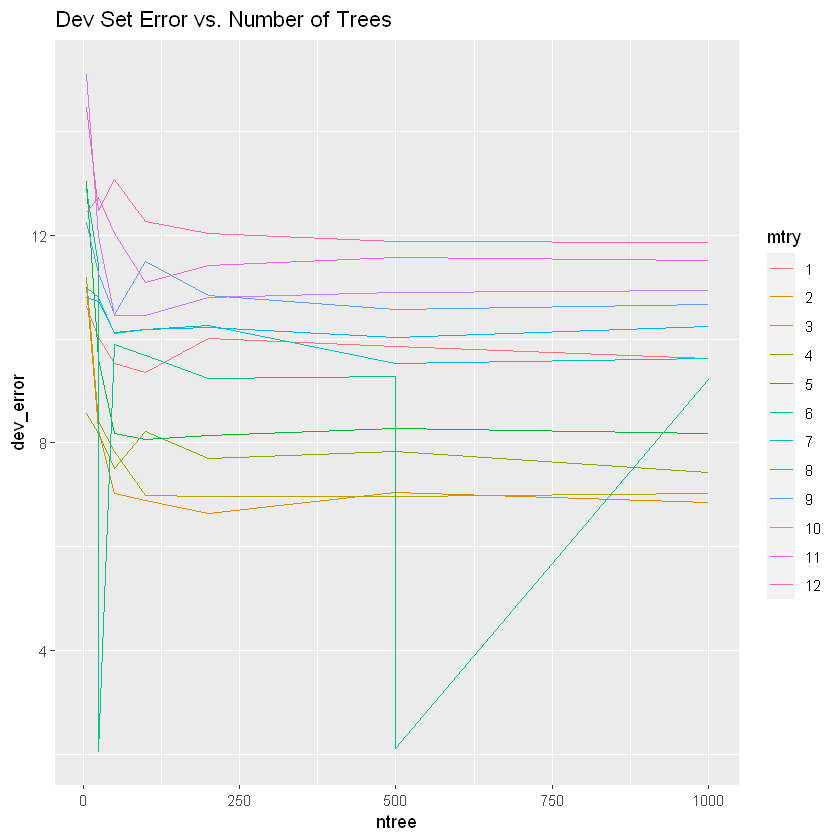

In [100]:
#plot each of the 12 mtry variable as its own line with "Dev Set Error" as the y axis and "Number of Trees" as the x axis
ggplot(data = dev_set_err, aes(x = ntree, y = dev_error)) + geom_line(aes(color=mtry)) + ggtitle("Dev Set Error vs. Number of Trees")